# Report: act_report

This report communicate the insights and displays the visualization(s) produced from the wrangled data for the Wrangle Act Project.

The Wrangle Act project objective is to gathered data from three different sources, assessed, cleaned and merged the three cleaned datasets into a master data table. Also, made some analysis to get insights and made some visualizations so as to communicate some of our findings.

To guide our analysis, six pertinent questions were asked. I listed these six questions which are related to what the dataset is all about. These questions guided me to make some exploratory efforts to answer each of the questions.

The questions are:

What are the five most popular dog breeds (breeds that appear more than others in the table?
Which dog breed has the highest retweet count?
What's the frequency distribution of the favorite count?
Is there a correlation between retweet count and favourite count?
What relational information can we get from the comparision of the dog age stages?
What dog's name is most popular (a name that appears more than others in the table)?
After a series of exploratory analysis, the answers I got to the stated analysis questions provided needed insights as required, and these insights were also used to generate some visualizations as needed.

Some of the insights generated are:

1. The five most popular breeds of dog in our dataset are golden_retriever, labrador_retriever, pembroke, chihuahua, and pug.
2. The highest retweet_count = 79515.
3. Labrador Retriever breed has the highest retweet count.
4. The correlation coefficient (r) between retweet_count and favorite_count is "0.7908904272414722". this positive correlation coefficient that's very close to +1 denotes that there's a positive and strong correlation between retweet_count and favorite_count. This should be obvious since a tweet that's favorited by many people has the high posibility of been retweeted.
5. Among the defined age stages, pupper has the highest number of occurence, hence it's the age stage of most of the dogs. The sum of the other defined age stage counts is less than the pupper count.

## Some Visualzations and accompanied deductions
### Importing needed packages

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
%matplotlib inline
plt.show()

### Import Master Dataset

In [2]:
# Import the twitter_archive_master.csv file into Pandas dataframe

master_table = pd.read_csv('twitter_archive_master.csv')

# Show first few rows
master_table.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,undefined,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,undefined,6514,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,undefined,4328,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,undefined,8964,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,undefined,9774,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


### Frequency Distribution of the favorite_count

In [3]:
# Getting statistical description of the favorite_count column

master_table.favorite_count.describe()

count      1983.000000
mean       8855.403933
std       12187.122447
min          81.000000
25%        1956.500000
50%        4078.000000
75%       11286.500000
max      132810.000000
Name: favorite_count, dtype: float64

(array([  1.56500000e+03,   2.73000000e+02,   1.01000000e+02,
          1.90000000e+01,   1.00000000e+01,   8.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          2.00000000e+00]),
 array([  8.10000000e+01,   1.33539000e+04,   2.66268000e+04,
          3.98997000e+04,   5.31726000e+04,   6.64455000e+04,
          7.97184000e+04,   9.29913000e+04,   1.06264200e+05,
          1.19537100e+05,   1.32810000e+05]),
 <a list of 10 Patch objects>)

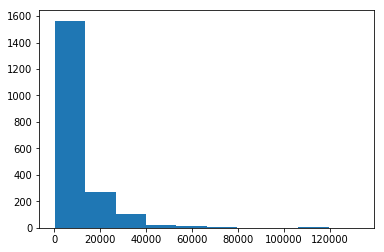

In [4]:
# Plotting an instogram

plt.hist(data = master_table, x='favorite_count')

In [5]:
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)

np.log10(master_table.favorite_count.describe())

count    3.297323
mean     3.947208
std      4.085901
min      1.908485
25%      3.291480
50%      3.610447
75%      4.052559
max      5.123231
Name: favorite_count, dtype: float64

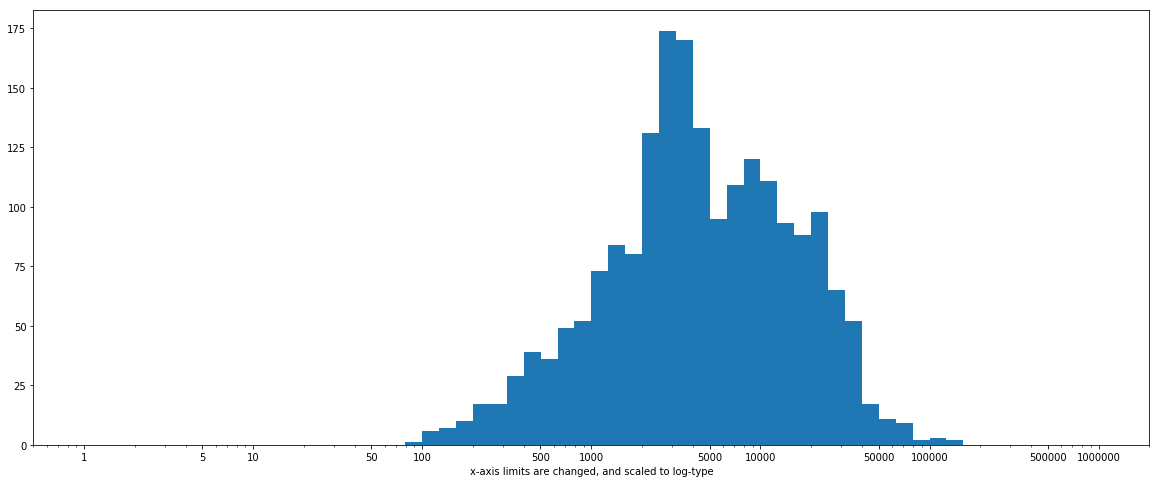

In [6]:
# Axis transformation
# Bin size

plt.figure(figsize = [20,8])

bins = 10 ** np.arange(0, 6+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000 ]

# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=master_table, x='favorite_count', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type');

# Apply x-ticks
plt.xticks(ticks, labels);

#### InsightS

1. The original data for favorite count is right-skewed (positively skewed).
2. We use logarithmic transformation along the x-axis to normalized distribution.


## Correlation Between retweet_count and favorite_count

In [7]:
# Calculate the correlation coefficient

correlation = master_table.retweet_count.corr(master_table.favorite_count)
correlation

0.91214931567994584

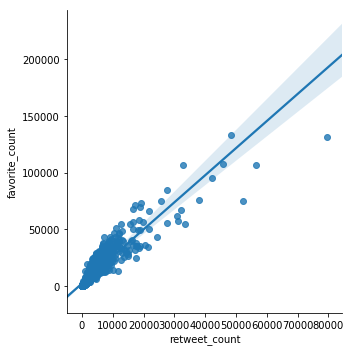

In [15]:
ax = sns.lmplot(x="retweet_count", y="favorite_count", data=master_table)

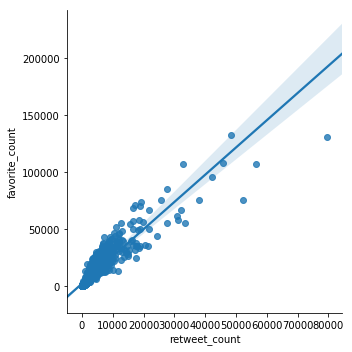

In [9]:
sns.lmplot(x="retweet_count", y="favorite_count", data=master_table);

### Insight

1. r (correlation coefficient) = 0.7908904272414722
2. A positive correlation coefficient that's very close to +1 denotes that there's a positive and strong correlation between retweet_count and favorite_count. This should be obvious since a tweet that's favorited by many people has the high posibility of been retweeted.


#### Visualizing the relational information gotten from the comparision of the dog age stages

In [16]:
# Getting the number of dogs belonging to each age stage

master_table.age_stage.value_counts()

undefined    1688
pupper        203
doggo          63
puppo          22
floof           7
Name: age_stage, dtype: int64

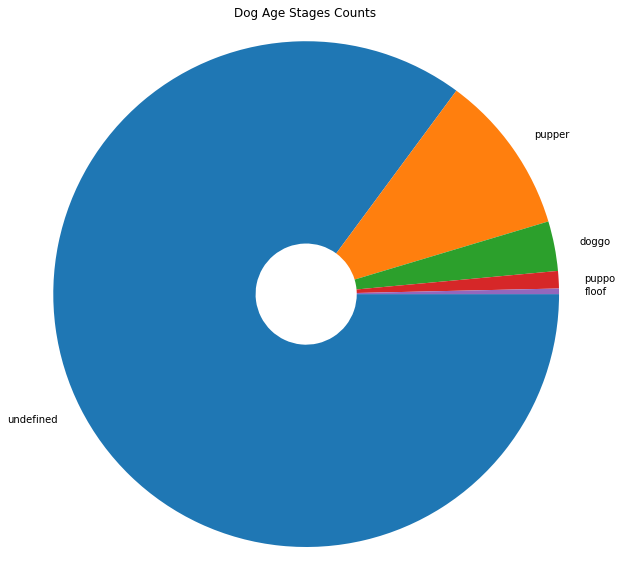

In [17]:
#Plotting a Pie chart

age_stage_counts = master_table.age_stage.value_counts()
labels = master_table.age_stage.value_counts().index

plt_1 = plt.figure(figsize=(10,10))
plt.pie(age_stage_counts, labels = labels, startangle =0, counterclock = False, wedgeprops = {'width' : 0.8});
plt.axis('equal');
plt.title("Dog Age Stages Counts");

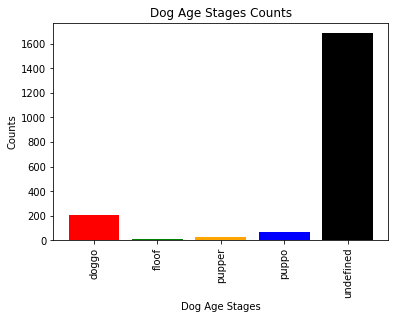

In [18]:
# This is a catgorical data, so Bar chart will be a suitable chart
# Plotting a Bar chart

x = master_table['age_stage'].unique()
y = master_table['age_stage'].value_counts()
color=['black', 'red', 'blue', 'orange', 'green']
plt.bar(x, height= y, color = color)
plt.xticks(rotation=90)
plt.xlabel('Dog Age Stages')
plt.ylabel('Counts')
plt.title("Dog Age Stages Counts");

#### Insights

1. Many of the dog rows have undefined dog age stage.
2. Among the defined age stages, pupper has the highest number of occurence, hence it's the age stage of most of the dogs. The sum of the other age stage counts is less than the doggo count.

### Conclusion

I hope with the report above I was able to communicate the useful insights from the wrangling process of twitter_archive_master dataset and provided you with some needed visualizations for your understanding.

#### Limitations

There were some limitations to the wrangling process which might have in one way or the other influenced the result of the wrangling process.

1. Some columns have too many null values and were dropped.
2. Some rows got removed automatically when merging the three datasets. This is because "tweet_id" is set as the axis on which the datasets were merged, and the tweet_count table and image_precitions tables both have lesser number of rows to the twitter_archive table, hence the final merged table ended up with lesser rows than the twitter_archive table.

Below are the website and tools that were used that aided in the investigation of the dataset

1. pandas
2. matplotlib
3. seaborn